In [1]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
# print(matplotlib.get_backend())
# matplotlib.use('TkAgg')
from ndtpy.tools import list_all_files
import numpy as np
import os

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image, ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)
        self.bn1 = nn.BatchNorm2d(20)
        self.bn2 = nn.BatchNorm2d(50)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 4 * 50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [3]:

def histeq(im, nbr_bins=256):
    """ 对一幅灰度图像进行直方图均衡化"""

    # 计算图像的直方图
    imhist, bins = np.histogram(im.flatten(), nbr_bins, normed=True)
    cdf = imhist.cumsum()  # cumulative distribution function
    cdf = 255 * cdf / cdf[-1]  # 归一化

    # 使用累积分布函数的线性插值，计算新的像素值
    im2 = np.interp(im.flatten(), bins[:-1], cdf)

    return im2.reshape(im.shape), cdf


def denoise(im, U_init, tolerance=0.1, tau=0.125, tv_weight=100):
    """ 使用A. Chambolle（2005）在公式（11）中的计算步骤实现Rudin-Osher-Fatemi（ROF）去噪模型
      输入：含有噪声的输入图像（灰度图像）、U 的初始值、TV 正则项权值、步长、停业条件
      输出：去噪和去除纹理后的图像、纹理残留"""

    m, n = im.shape  # 噪声图像的大小

    # 初始化
    U = U_init
    Px = im  # 对偶域的x 分量
    Py = im  # 对偶域的y 分量
    error = 1

    while error > tolerance:
        Uold = U

        # 原始变量的梯度
        GradUx = np.roll(U, -1, axis=1) - U  # 变量U 梯度的x 分量
        GradUy = np.roll(U, -1, axis=0) - U  # 变量U 梯度的y 分量

        # 更新对偶变量
        PxNew = Px + (tau / tv_weight) * GradUx
        PyNew = Py + (tau / tv_weight) * GradUy
        NormNew = np.maximum(1, np.sqrt(PxNew ** 2 + PyNew ** 2))

        Px = PxNew / NormNew  # 更新x 分量（对偶）
        Py = PyNew / NormNew  # 更新y 分量（对偶）

        # 更新原始变量
        RxPx = np.roll(Px, 1, axis=1)  # 对x 分量进行向右x 轴平移
        RyPy = np.roll(Py, 1, axis=0)  # 对y 分量进行向右y 轴平移

        DivP = (Px - RxPx) + (Py - RyPy)  # 对偶域的散度
        U = im + tv_weight * DivP  # 更新原始变量

        # 更新误差
        error = np.linalg.norm(U - Uold) / np.sqrt(n * m);

    return U, im - U  # 去噪后的图像和纹理残余

fine tuning dataset\00000.jpg 00000
(160, 120)


C:\Users\wang1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  
C:\Users\wang1\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\serialization.py:420: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + container_type.__name__ + ". It won't be checked "


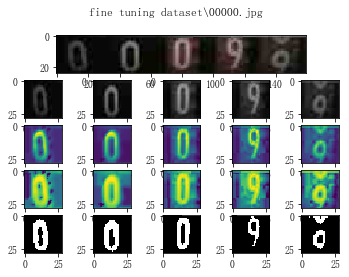

fine tuning dataset\00077 (2).jpg 00077
(160, 120)


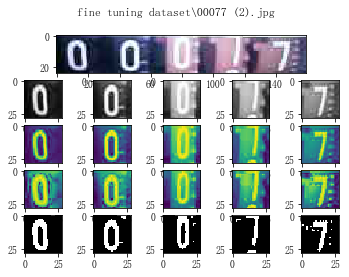

fine tuning dataset\00077.jpg 00077
(160, 120)


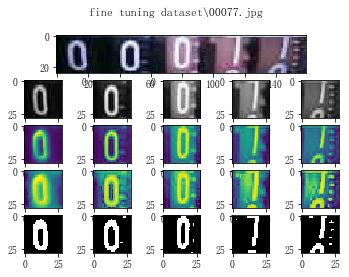

fine tuning dataset\00078.jpg 00078
(160, 120)


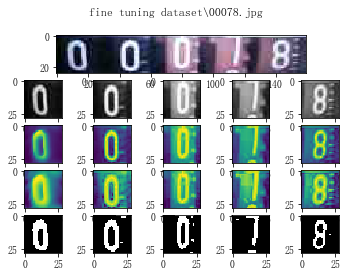

fine tuning dataset\00079 (2).jpg 00079
(160, 120)


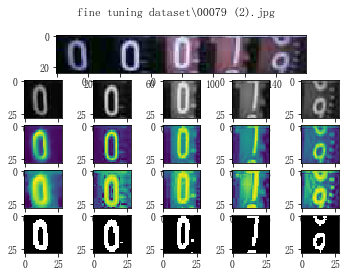

fine tuning dataset\00079.jpg 00079
(160, 120)


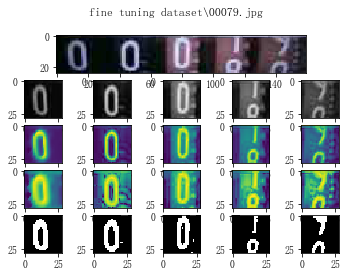

fine tuning dataset\00080.jpg 00080
(160, 120)


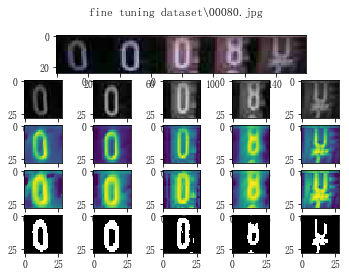

fine tuning dataset\00082 (2).jpg 00082
(160, 120)


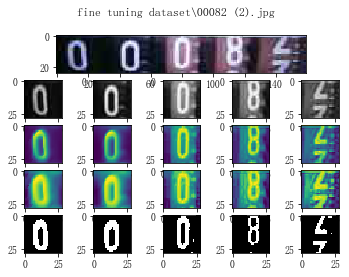

fine tuning dataset\00082 (3).jpg 00082
(160, 120)


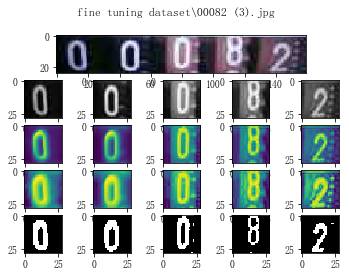

fine tuning dataset\00083.jpg 00083
(160, 120)


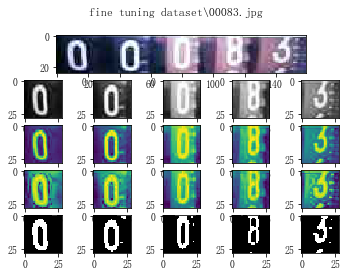

fine tuning dataset\00084 (2).jpg 00084
(160, 120)


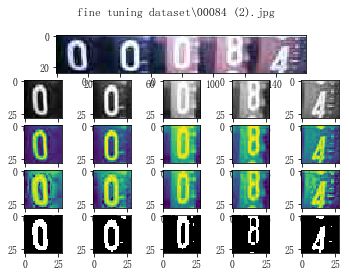

fine tuning dataset\00084.jpg 00084
(160, 120)


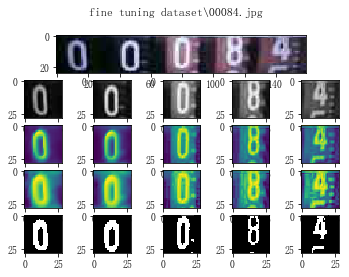

fine tuning dataset\00085 (2).jpg 00085
(160, 120)


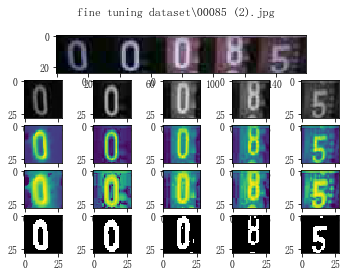

fine tuning dataset\00085.jpg 00085
(160, 120)


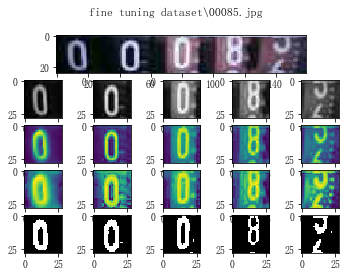

fine tuning dataset\00086.jpg 00086
(160, 120)


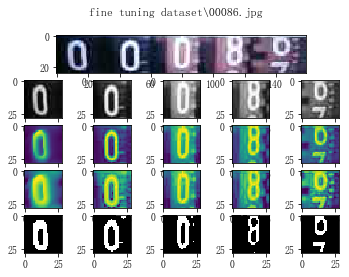

fine tuning dataset\00087.jpg 00087
(160, 120)


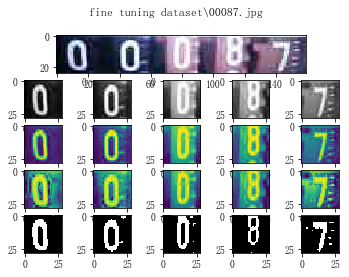

fine tuning dataset\00088 (2).jpg 00088
(160, 120)


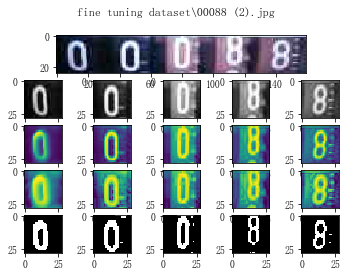

fine tuning dataset\00089 (2).jpg 00089
(160, 120)


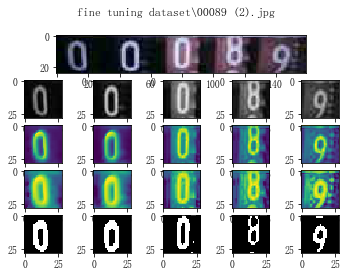

fine tuning dataset\00089.jpg 00089
(160, 120)


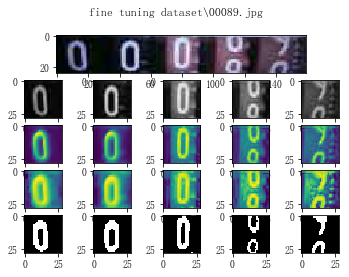

fine tuning dataset\00090 (2).jpg 00090
(160, 120)


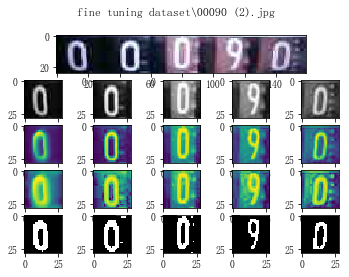

fine tuning dataset\00090.jpg 00090
(160, 120)


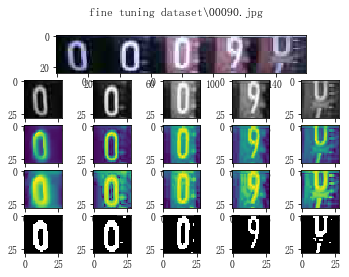

fine tuning dataset\00091 (2).jpg 00091
(160, 120)


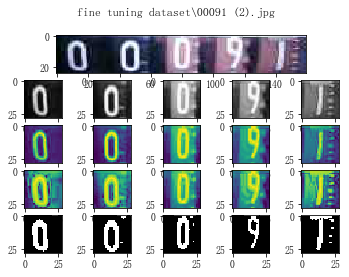

fine tuning dataset\00091.jpg 00091
(160, 120)


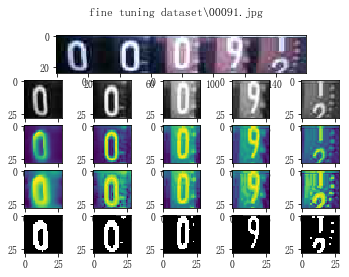

fine tuning dataset\00092 (2).jpg 00092
(160, 120)


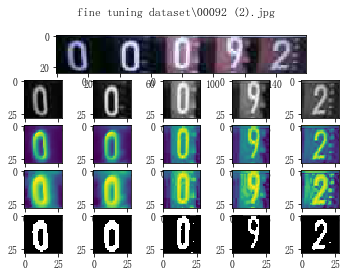

fine tuning dataset\00092.jpg 00092
(160, 120)


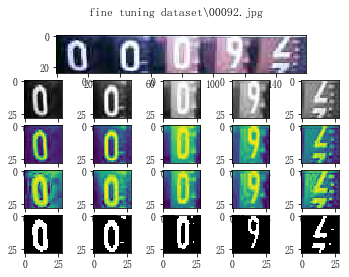

fine tuning dataset\00093 (2).jpg 00093
(160, 120)


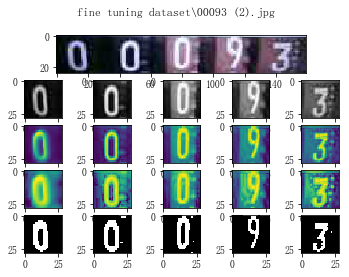

fine tuning dataset\00094.jpg 00094
(160, 120)


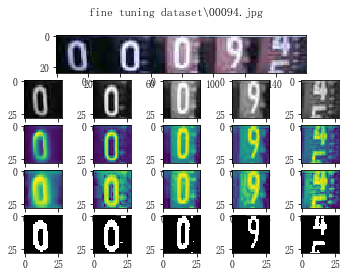

fine tuning dataset\00095 (2).jpg 00095
(160, 120)


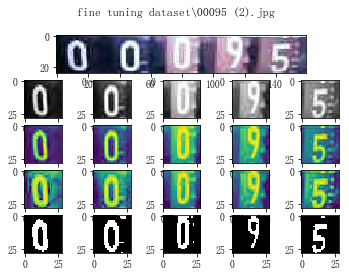

fine tuning dataset\00095.jpg 00095
(160, 120)


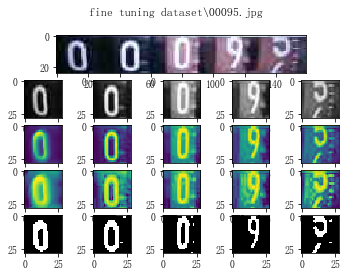

fine tuning dataset\00096.jpg 00096
(160, 120)


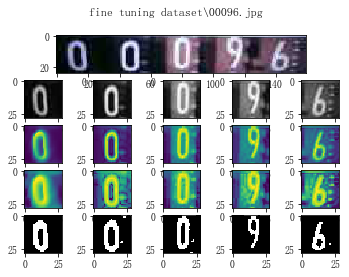

fine tuning dataset\00099 (2).jpg 00099
(160, 120)


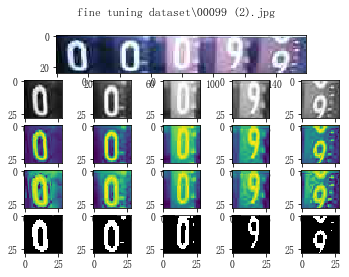

fine tuning dataset\00106 (3).jpg 00106
(160, 120)


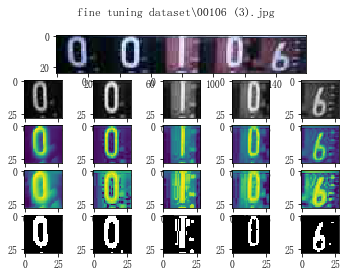

fine tuning dataset\00106 (5).jpg 00106
(160, 120)


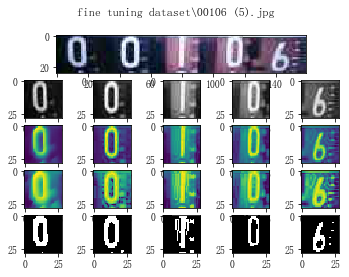

fine tuning dataset\00106.jpg 00106
(160, 120)


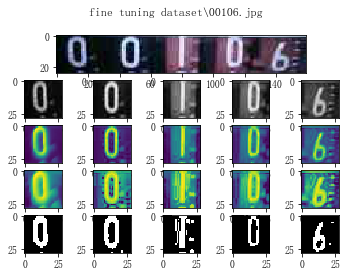

In [5]:
for file in list_all_files('fine tuning dataset'):
    start= str(file).rfind('\\')
    mobile = file[start+1:start+6]
    print(file,mobile)
    img = Image.open(file)
    # 二值化，切割，放缩
    print(img.size)
    if img.size[1] == 120:
        img = img.crop((0, 78, 160, 110))
    img = img.crop((0, 8, 160, 32))
    plt.subplot(5,1,1)
    plt.imshow(img)
    digits = []
    thd = [200,200,200,220,210]  # 切割得到清晰的数字
    for i in range(5):
        digit = img.crop((
            img.width * i // 5,0,
            img.width * (i+1) // 5, img.height
        )).resize((28,28),Image.ANTIALIAS)
        digit = digit.convert('L')
        plt.subplot(5,5,6+i)
        plt.imshow(digit)
        digit = np.uint8(digit)
        digit = denoise(digit,digit,0.9)[0]
        plt.subplot(5,5,11+i)
        plt.imshow(digit)
        digit = histeq(digit)[0]
        plt.subplot(5,5,16+i)
        plt.imshow(digit)
        digit = np.uint8(digit)
        digit = Image.fromarray(digit)
        digit = digit.point([0 if j < thd[i] else 1 for j in range(256)], '1')
        digits.append(digit)
    ret = []
    model = torch.load('model_digit_cpu.mdl')
    model.eval()
    with torch.no_grad():
        for i, digit in enumerate(digits):
            plt.subplot(5, 5, i + 21)
            plt.imshow(digit)
            digit = np.uint8(digit)
            data = digit[np.newaxis, np.newaxis, :, :]
            data = torch.FloatTensor(data)
            output = model(data)
            pred_label = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            ret.append(pred_label.item())
    plt.suptitle(file)
    plt.show()

